In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (2).csv


In [3]:
df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
df.shape

(16598, 10)

In [5]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [6]:
# 결측치가 Year, Genre, Publisher에서 발견되었고 대체방법이 없어 결측치를 제거하고 다시 정렬
df = df.dropna().reset_index(drop=True)
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16236,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [7]:
# 결측치가 제거되었는지 데이터베이스 크기는 어떤지 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  object 
 7   EU_Sales     16241 non-null  object 
 8   JP_Sales     16241 non-null  object 
 9   Other_Sales  16241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


In [8]:
# 필요없는 열인 Unnamed: 0 제거
df = df.drop('Unnamed: 0',axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [9]:
# Year의 데이터타입을 int로 바꿈
df = df.astype({'Year':'int'})
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [10]:
# 너무 과거 1900년 이전의 데이터는 이상치로 판단하고 제거함
df = df.query('Year > 1900').sort_values('Year').reset_index(drop=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0,0.01
1,Freeway,2600,1980,Action,Activision,0.32,0.02,0,0
2,Defender,2600,1980,Misc,Atari,0.99,0.05,0,0.01
3,Checkers,2600,1980,Misc,Atari,0.22,0.01,0,0K
4,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0,0.03
...,...,...,...,...,...,...,...,...,...
16136,Psycho-Pass: Mandatory Happiness,PSV,2016,Adventure,Nippon Ichi Software,0,0.01,0.01,0
16137,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,0.01,0
16138,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,0.03,0
16139,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,0.01,0


In [11]:
# 계산하기 쉽게 판매량 데이터프레임만 불러옴
df_sales = df.iloc[:,5:9]
df_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.72,0.04,0,0.01
1,0.32,0.02,0,0
2,0.99,0.05,0,0.01
3,0.22,0.01,0,0K
4,2.56,0.17,0,0.03
...,...,...,...,...
16136,0,0.01,0.01,0
16137,0,0,0.01,0
16138,0,0,0.03,0
16139,0,0,0.01,0


In [12]:
# df_sales에서 데이트형을 float로 바꾸기 위해 M는 없애고 K는 /1000으로 바꿈
for i in range(0,4):
  df_sales.iloc[:,i] = df_sales.iloc[:,i].str.replace('M','')
  df_sales.iloc[:,i] = df_sales.iloc[:,i].str.replace('K','/1000')
df_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.72,0.04,0,0.01
1,0.32,0.02,0,0
2,0.99,0.05,0,0.01
3,0.22,0.01,0,0/1000
4,2.56,0.17,0,0.03
...,...,...,...,...
16136,0,0.01,0.01,0
16137,0,0,0.01,0
16138,0,0,0.03,0
16139,0,0,0.01,0


In [13]:
# K를 /1000으로 바꾼것을 소수로 변환시켜줌
for i in range(0,4):
  for j in range(0,len(df_sales)):
    df_sales.iloc[j,i] = eval(df_sales.iloc[j,i])
df_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.72,0.04,0,0.01
1,0.32,0.02,0,0
2,0.99,0.05,0,0.01
3,0.22,0.01,0,0.0
4,2.56,0.17,0,0.03
...,...,...,...,...
16136,0,0.01,0.01,0
16137,0,0,0.01,0
16138,0,0,0.03,0
16139,0,0,0.01,0


In [14]:
# df_sales의 데이터타입을 모두 float로 바꿈
df_sales.astype('float')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.72,0.04,0.00,0.01
1,0.32,0.02,0.00,0.00
2,0.99,0.05,0.00,0.01
3,0.22,0.01,0.00,0.00
4,2.56,0.17,0.00,0.03
...,...,...,...,...
16136,0.00,0.01,0.01,0.00
16137,0.00,0.00,0.01,0.00
16138,0.00,0.00,0.03,0.00
16139,0.00,0.00,0.01,0.00


In [15]:
# float로 바꾼 df_sales를 원래 df에 다시 넣음
df.iloc[:,5:9] = df_sales
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0,0.01
1,Freeway,2600,1980,Action,Activision,0.32,0.02,0,0
2,Defender,2600,1980,Misc,Atari,0.99,0.05,0,0.01
3,Checkers,2600,1980,Misc,Atari,0.22,0.01,0,0.0
4,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0,0.03
...,...,...,...,...,...,...,...,...,...
16136,Psycho-Pass: Mandatory Happiness,PSV,2016,Adventure,Nippon Ichi Software,0,0.01,0.01,0
16137,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,0.01,0
16138,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,0.03,0
16139,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,0.01,0


In [16]:
df.shape

(16141, 9)

In [17]:
# 장르별 판매량을 알아보기 위해(계산을 편하게 하기 위해) 나머지 열들을 제거
df_genre = df.drop(['Name','Platform','Year','Publisher'],axis=1)
df_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Fighting,0.72,0.04,0,0.01
1,Action,0.32,0.02,0,0
2,Misc,0.99,0.05,0,0.01
3,Misc,0.22,0.01,0,0.0
4,Shooter,2.56,0.17,0,0.03
...,...,...,...,...,...
16136,Adventure,0,0.01,0.01,0
16137,Action,0,0,0.01,0
16138,Role-Playing,0,0,0.03,0
16139,Role-Playing,0,0,0.01,0


In [18]:
# 장르별 나라별 판매량을 확인
df_sales_country_genre = df_genre.groupby('Genre').sum()
df_sales_country_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,855.96,512.52,155.73,183.64
Adventure,101.33,63.32,51.79,16.64
Fighting,220.11,99.72,86.39,36.10
Misc,394.29,207.68,103.71,72.54
Platform,442.46,199.40,129.22,51.15
Puzzle,121.00,50.39,56.19,12.39
Racing,353.57,234.20,55.42,76.23
Role-Playing,307.08,176.31,336.25,54.71
Shooter,570.89,307.26,37.34,100.82


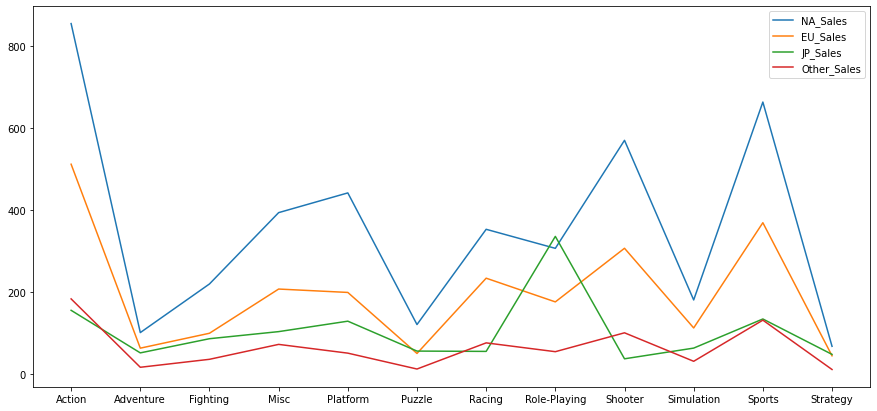

In [19]:
plt.figure(figsize=(15,7))
plt.plot(df_sales_country_genre.index,df_sales_country_genre['NA_Sales'])
plt.plot(df_sales_country_genre.index,df_sales_country_genre['EU_Sales'])
plt.plot(df_sales_country_genre.index,df_sales_country_genre['JP_Sales'])
plt.plot(df_sales_country_genre.index,df_sales_country_genre['Other_Sales'])
plt.legend(df_sales_country_genre.columns)

In [20]:
# 장르별 나라별 판매량의 비율을 확인 (열의 데이터를 모두 더하면 1)
ratio_sales_country_genre = df_sales_country_genre.div(df_sales_country_genre.sum(axis=0),axis=1)
ratio_sales_country_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.199996,0.215537,0.123771,0.235923
Adventure,0.023676,0.026629,0.041162,0.021377
Fighting,0.051429,0.041937,0.068661,0.046378
Misc,0.092126,0.087339,0.082427,0.093192
Platform,0.103381,0.083857,0.102701,0.065713
Puzzle,0.028272,0.021191,0.044659,0.015917
Racing,0.082612,0.098492,0.044047,0.097933
Role-Playing,0.071750,0.074146,0.267245,0.070286
Shooter,0.133389,0.129216,0.029677,0.129524


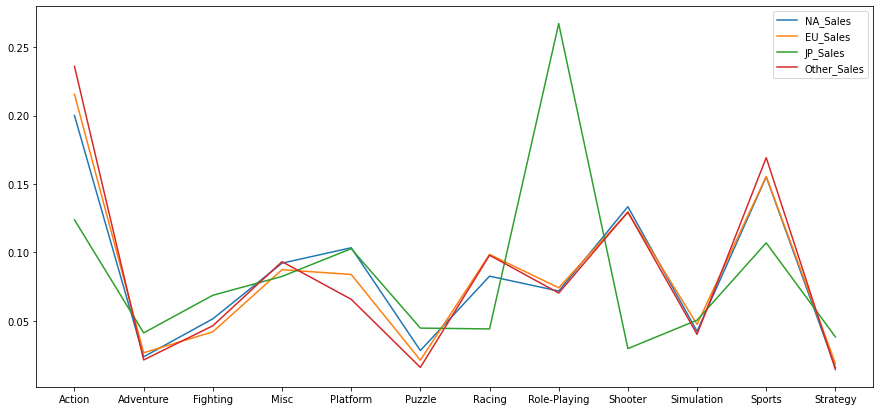

In [21]:
# 한 꺽은선 그래프에 나라별 판매량 비율을 넣어 비교
plt.figure(figsize=(15,7))
plt.plot(ratio_sales_country_genre.index,ratio_sales_country_genre['NA_Sales'])
plt.plot(ratio_sales_country_genre.index,ratio_sales_country_genre['EU_Sales'])
plt.plot(ratio_sales_country_genre.index,ratio_sales_country_genre['JP_Sales'])
plt.plot(ratio_sales_country_genre.index,ratio_sales_country_genre['Other_Sales'])
plt.legend(ratio_sales_country_genre.columns)

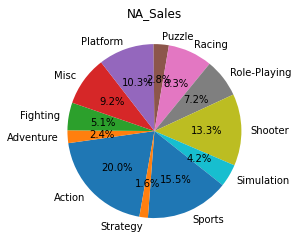

In [22]:
# 나라별로 장르별 판매량 원그래프로 비율 확인
plt.title('NA_Sales')
plt.pie(df_sales_country_genre['NA_Sales'], labels=df_sales_country_genre.index, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

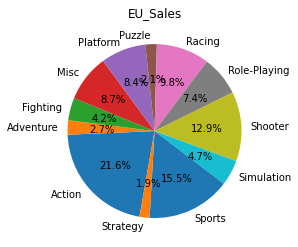

In [23]:
plt.title('EU_Sales')
plt.pie(df_sales_country_genre['EU_Sales'], labels=df_sales_country_genre.index, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

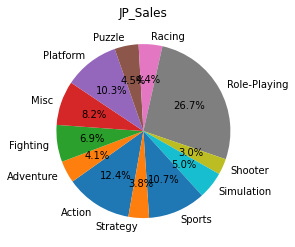

In [24]:
plt.title('JP_Sales')
plt.pie(df_sales_country_genre['JP_Sales'], labels=df_sales_country_genre.index, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

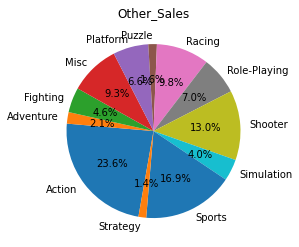

In [25]:
plt.title('Other_Sales')
plt.pie(df_sales_country_genre['Other_Sales'], labels=df_sales_country_genre.index, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

In [26]:
# 나라별 장르별 판매량을 순서대로 정렬
for i in range(0,4):
  print(f'{ratio_sales_country_genre.columns[i]}')
  for j in range(0,12):
    print(f'{j+1}, {ratio_sales_country_genre.iloc[:,i].sort_values(ascending=False).index[j]}')
  print('\n')

NA_Sales
1, Action
2, Sports
3, Shooter
4, Platform
5, Misc
6, Racing
7, Role-Playing
8, Fighting
9, Simulation
10, Puzzle
11, Adventure
12, Strategy


EU_Sales
1, Action
2, Sports
3, Shooter
4, Racing
5, Misc
6, Platform
7, Role-Playing
8, Simulation
9, Fighting
10, Adventure
11, Puzzle
12, Strategy


JP_Sales
1, Role-Playing
2, Action
3, Sports
4, Platform
5, Misc
6, Fighting
7, Simulation
8, Puzzle
9, Racing
10, Adventure
11, Strategy
12, Shooter


Other_Sales
1, Action
2, Sports
3, Shooter
4, Racing
5, Misc
6, Role-Playing
7, Platform
8, Fighting
9, Simulation
10, Adventure
11, Puzzle
12, Strategy




In [27]:
# 카이제곱 검정
# 귀무가설 : 지역마다 선호하는 장르가 같다.

chi2_val, p, dof, expected= chi2_contingency(df_sales_country_genre, correction=False)
if p<0.5:
  print(f'p-value = {p}이고 0.5 보다 작으므로 귀무가설을 기각한다. 따라서 지역마다 선호하는 장르가 다르다.')
else:
  print(f'p-value = {p}이고 0.5 보다 큼으로 귀무가설이 성립한다. 따라서 지역마다 선호하는 장르가 같다.')

p-value = 3.096523659725125e-123이고 0.5 보다 작으므로 귀무가설을 기각한다. 따라서 지역마다 선호하는 장르가 다르다.


In [28]:
# 1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
# 다르다. 나라별 선호 게임 장르는 위와 같다.

In [29]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0,0.01
1,Freeway,2600,1980,Action,Activision,0.32,0.02,0,0
2,Defender,2600,1980,Misc,Atari,0.99,0.05,0,0.01
3,Checkers,2600,1980,Misc,Atari,0.22,0.01,0,0.0
4,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0,0.03
...,...,...,...,...,...,...,...,...,...
16136,Psycho-Pass: Mandatory Happiness,PSV,2016,Adventure,Nippon Ichi Software,0,0.01,0.01,0
16137,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,0.01,0
16138,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,0.03,0
16139,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,0.01,0


In [30]:
# 연도별 게임 장르를 확인하기 위해 필요한 데이터만 추출
df_year_genre = df[['Year','Genre']]
df_year_genre

,Year,Genre
0,1980,Fighting
1,1980,Action
2,1980,Misc
3,1980,Misc
4,1980,Shooter
...,...,...
16136,2016,Adventure
16137,2017,Action
16138,2017,Role-Playing
16139,2017,Role-Playing


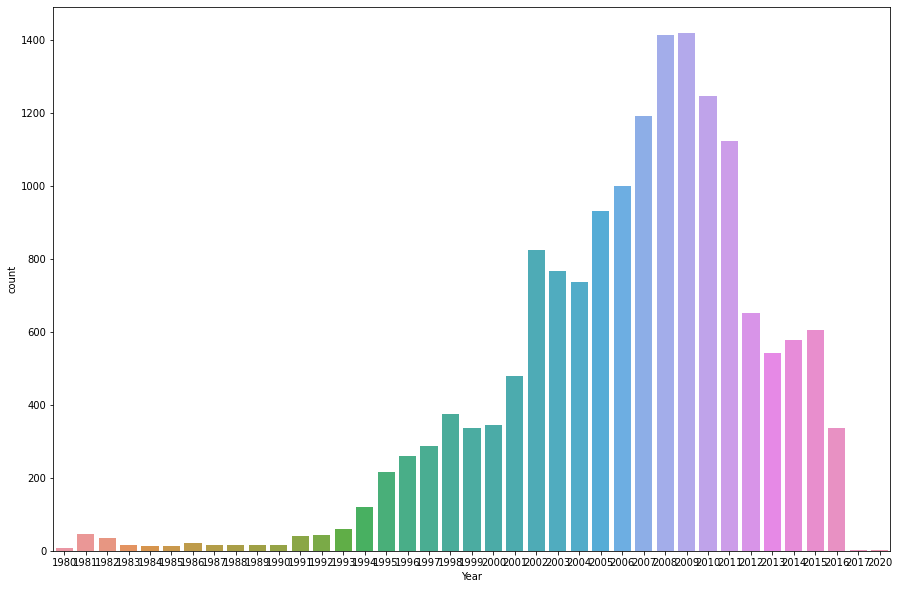

In [31]:
# countplot을 이용해 연도별 발매된 게임의 숫자를 확인
ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(data=df_year_genre,x='Year')

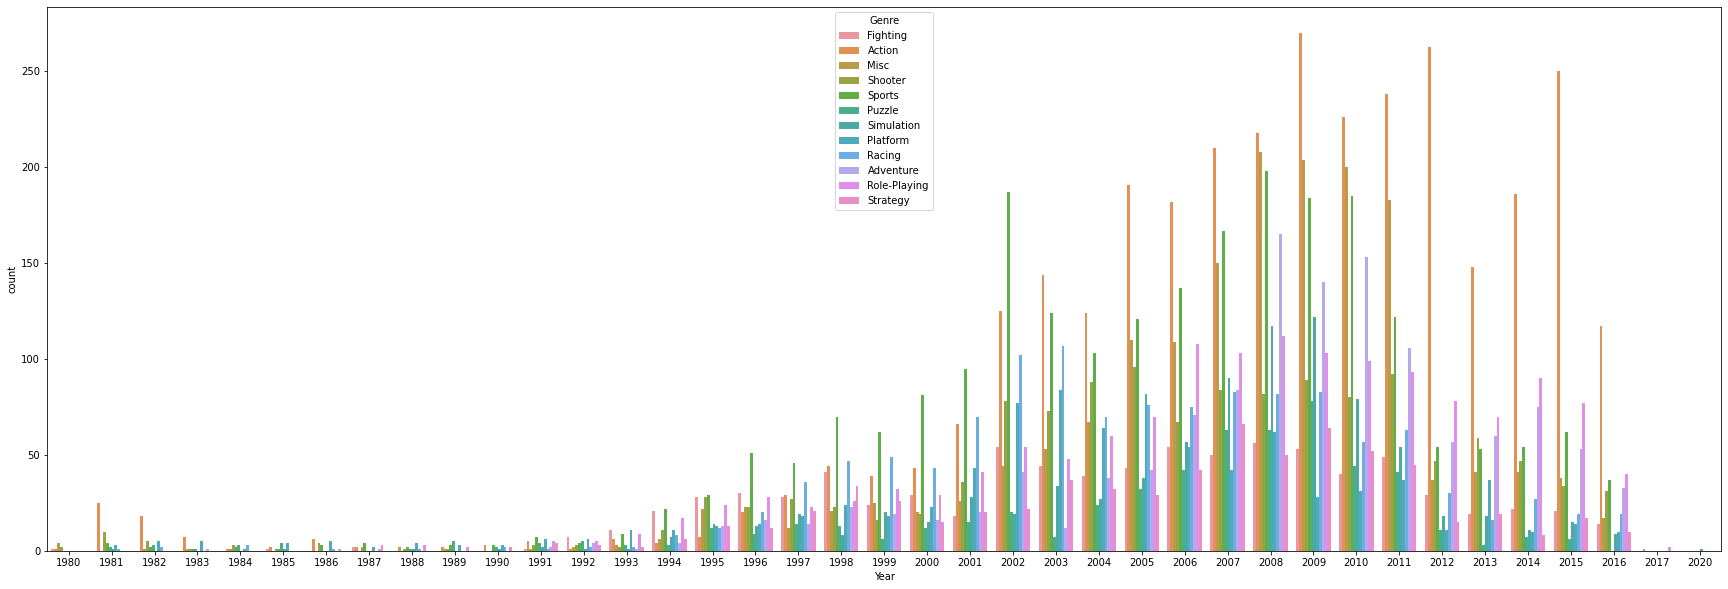

In [32]:
# 열도별 장르별 발매량을 확인
ax = plt.subplots(figsize=(30,10))
ax = sns.countplot(data=df_year_genre,x='Year',hue='Genre')

In [33]:
# 발매된 년도를 확인
year = df_year_genre.groupby(df_year_genre.Year)
year.size().index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2020],
           dtype='int64', name='Year')

In [34]:
# 연도별 장르별 발매된 게임 수 확인
def trend(year):
  trend_number = df_year_genre[df_year_genre['Year'] == year].value_counts()
  print(trend_number)

In [35]:
# 연도별 장르별 발매된 게임 수 확인
for i in year.size().index:
  print(trend(i))

Year  Genre   
1980  Misc        4
      Shooter     2
      Action      1
      Fighting    1
dtype: int64
None
Year  Genre     
1981  Action        25
      Shooter       10
      Sports         4
      Platform       3
      Puzzle         2
      Racing         1
      Simulation     1
dtype: int64
None
Year  Genre   
1982  Action      18
      Platform     5
      Shooter      5
      Puzzle       3
      Racing       2
      Sports       2
      Misc         1
dtype: int64
None
Year  Genre    
1983  Action       7
      Platform     5
      Adventure    1
      Misc         1
      Puzzle       1
      Shooter      1
      Sports       1
dtype: int64
None
Year  Genre   
1984  Puzzle      3
      Racing      3
      Shooter     3
      Sports      2
      Action      1
      Misc        1
      Platform    1
dtype: int64
None
Year  Genre     
1985  Platform      4
      Puzzle        4
      Action        2
      Fighting      1
      Shooter       1
      Simulation    1
      Sp

In [36]:
# 국가별 판매량 대신 총 판매량 데이트를 새로 만듬
df['Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
0,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0,0.01,0.77
1,Freeway,2600,1980,Action,Activision,0.32,0.02,0,0,0.34
2,Defender,2600,1980,Misc,Atari,0.99,0.05,0,0.01,1.05
3,Checkers,2600,1980,Misc,Atari,0.22,0.01,0,0.0,0.23
4,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0,0.03,2.76
...,...,...,...,...,...,...,...,...,...,...
16136,Psycho-Pass: Mandatory Happiness,PSV,2016,Adventure,Nippon Ichi Software,0,0.01,0.01,0,0.02
16137,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,0.01,0,0.01
16138,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,0.03,0,0.03
16139,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,0.01,0,0.01


In [37]:
# 판매량이 가장 많은 게임 확인
df = df.sort_values(by='Sales',ascending=False)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
6654,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
128,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
8549,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
9785,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.0
953,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.38
...,...,...,...,...,...,...,...,...,...,...
7272,F.E.A.R. Perseus Mandate,PC,2007,Shooter,Vivendi Games,0.01,0,0,0,0.01
5218,Snood 2: On Vacation,GBA,2005,Puzzle,Zoo Digital Publishing,0.01,0,0,0,0.01
13571,Pro Angler Moves,PS3,2012,Sports,"Interworks Unlimited, Inc.",0.01,0,0,0,0.01
10091,Gokuhou!! Mecha Mote Iinchou: Girls Motekawa Box,DS,2009,Simulation,Konami Digital Entertainment,0,0,0.01,0,0.01


In [38]:
df_genre_by_year = df.groupby(['Year', 'Genre'])['Sales'].sum().unstack()
df_genre_by_year = df_genre_by_year.fillna(0)
df_genre_by_year = df_genre_by_year.reset_index()
df_genre_by_year

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980,0.34,0.00,0.77,2.70,0.00,0.00,0.00,0.00,7.07,0.00,0.00,0.00
1,1981,14.79,0.00,0.00,0.00,6.92,2.25,0.48,0.00,10.02,0.44,0.78,0.00
2,1982,6.50,0.00,0.00,0.87,5.03,10.04,1.57,0.00,3.81,0.00,1.06,0.00
3,1983,2.86,0.40,0.00,2.14,6.93,0.78,0.00,0.00,0.49,0.00,3.20,0.00
4,1984,1.85,0.00,0.00,1.45,0.69,3.14,5.95,0.00,31.10,0.00,6.17,0.00
5,1985,3.52,0.00,1.05,0.00,43.17,3.21,0.00,0.00,1.00,0.04,1.96,0.00
6,1986,13.74,0.00,0.00,0.00,8.34,0.00,1.96,2.52,3.89,0.00,5.58,0.00
7,1987,1.11,4.38,5.42,0.00,1.74,0.00,0.00,4.65,0.69,0.00,3.71,0.00
8,1988,1.74,0.00,0.00,0.00,27.73,5.58,2.14,5.88,0.51,0.03,3.60,0.00
9,1989,4.65,0.00,0.00,1.28,20.66,37.75,0.00,2.20,1.19,0.00,5.72,0.00


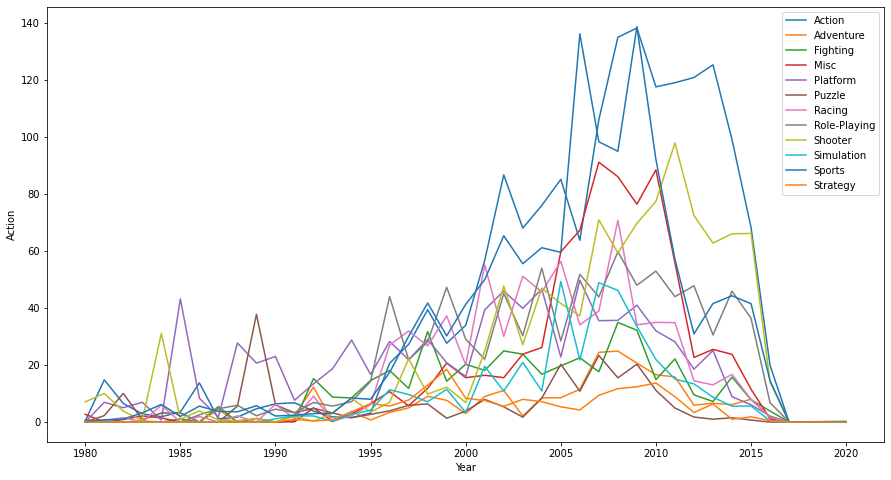

In [39]:
plt.figure(figsize=(15, 8))
for i in range(1, len(df_genre_by_year.columns)):
    sns.lineplot(data=df_genre_by_year, x='Year', y=df_genre_by_year.columns[i], label=df_genre_by_year.columns[i])

In [40]:
# 2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

# 1980 ~ 1993 : data 숫자가 적고 인기가 고르게 분포됨
# 1994 ~ 1996 : Sports의 인기가 가장 많고 그 다음으로는 Fighting.
# 1998 ~ 2001 : Sports, Racing, Action 순으로 인기가 많지만 Action의 인기가 증가하고 있고 2001년에는 Action이 Racing의 인기를 넘어섬.
# 2002 ~ 2007 : Action, Sport 순으로 인기가 많고 Misc의 인기가 점점 증가함.
# 2008 ~ 2011 : Action, Misc 순으로 인기가 많음.
# 2012 ~ 2016 : Action이 가장 인기 많고 그 다음으로는 Role-playing, Adventure, Sports가 인기가 많음.
# 2017 ~ 2020 : data 숫자가 적음

In [41]:
# 3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [68]:
df

,Name,Platform,Year,Genre,Publisher,Sales
6654,Wii Sports,Wii,2006,Sports,Nintendo,82.74
128,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
8549,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.83
9785,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.0
953,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.38
...,...,...,...,...,...,...
7272,F.E.A.R. Perseus Mandate,PC,2007,Shooter,Vivendi Games,0.01
5218,Snood 2: On Vacation,GBA,2005,Puzzle,Zoo Digital Publishing,0.01
13571,Pro Angler Moves,PS3,2012,Sports,"Interworks Unlimited, Inc.",0.01
10091,Gokuhou!! Mecha Mote Iinchou: Girls Motekawa Box,DS,2009,Simulation,Konami Digital Entertainment,0.01


In [45]:
# 조사된 전체 게임 판매량에서 wii sports 판매량의 비율
df.Sales.values[0] # wii sports 판매량
df.Sales.sum() #조사된 전체 게임 판매량
df.Sales.values[0]/df.Sales.sum() # 전체의 1%정도

0.009516525099632746

In [46]:
df = df.drop(['NA_Sales'	,'EU_Sales'	,'JP_Sales'	,'Other_Sales'],axis=1)

In [69]:
# 2000만장 초과 판매된 게임 데이터만 추출
df_popular = df.query('Sales > 20').reset_index(drop=True)
df_popular

,Name,Platform,Year,Genre,Publisher,Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,28.31


In [48]:
# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
# 

In [49]:
# 2000만장 초과 판매된 게임의 platform 확인
df_popular.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES'],
      dtype=object)

In [50]:
# platform별 판매량 확인
wii_sales = df_popular.query('Platform == "Wii"').Sales.sum()
nes_sales = df_popular.query('Platform == "NES"').Sales.sum()
gb_sales = df_popular.query('Platform == "GB"').Sales.sum()
ds_sales = df_popular.query('Platform == "DS"').Sales.sum()
x360_sales = df_popular.query('Platform == "X360"').Sales.sum()
ps3_sales = df_popular.query('Platform == "PS3"').Sales.sum()
ps2_sales = df_popular.query('Platform == "PS2"').Sales.sum()
snes_sales = df_popular.query('Platform == "SNES"').Sales.sum()
popular_sales = [wii_sales,nes_sales,gb_sales,ds_sales,x360_sales,ps3_sales,ps2_sales,snes_sales]

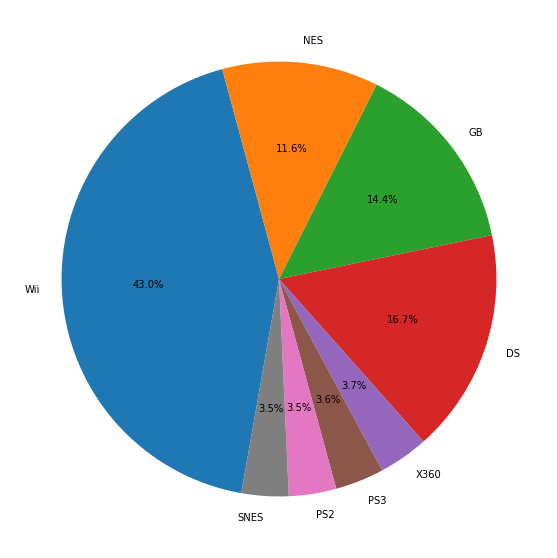

In [51]:
# platform별 판매량의 비율 확인 : wii DS GB 순으로 판매량이 높음
ax = plt.subplots(figsize=(15,10))

plt.pie(popular_sales, labels=df_popular.Platform.unique(), autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

In [52]:
# 2000만장 초과 판매한 게임의 platform 확인
df_popular.value_counts(df_popular.Platform)

Platform
Wii     7
DS      4
GB      3
NES     2
PS2     1
PS3     1
SNES    1
X360    1
dtype: int64

In [53]:
# 2000만장 초과 판매한 게임의 genre 확인
df_popular.value_counts(df_popular.Genre)

Genre
Platform        4
Sports          4
Misc            3
Action          2
Racing          2
Role-Playing    2
Puzzle          1
Shooter         1
Simulation      1
dtype: int64

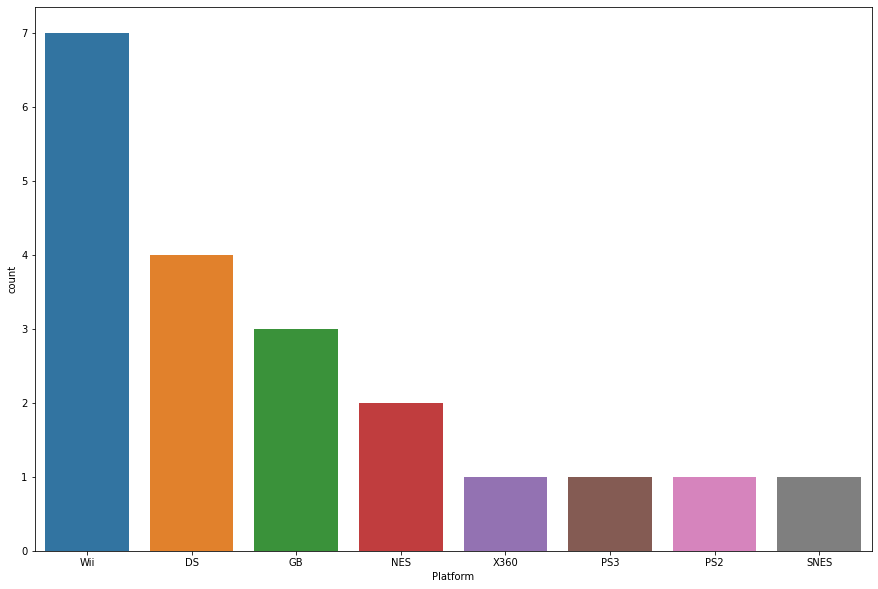

In [54]:
# 2000만장 초과 판매한 게임의 platform 시각화
ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(data=df_popular,x='Platform',order = df_popular['Platform'].value_counts().index)

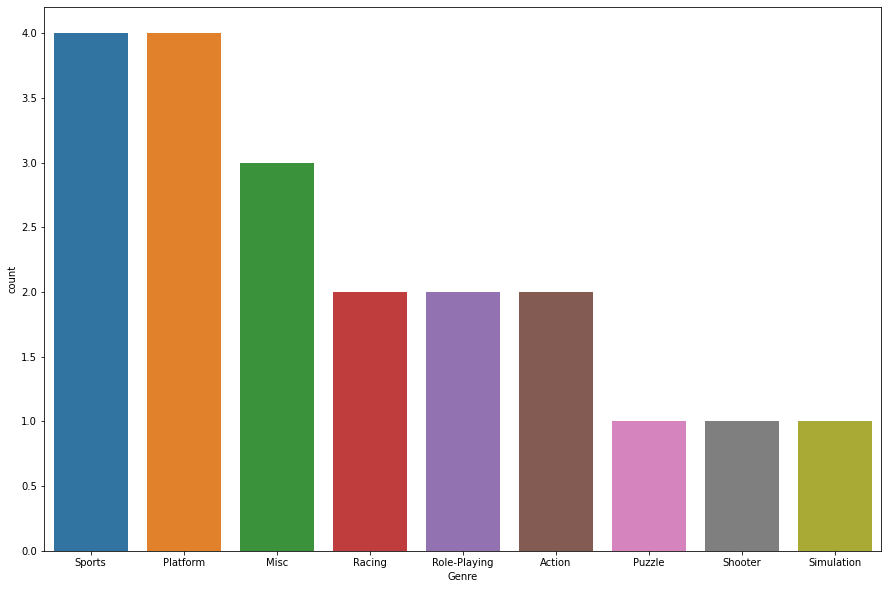

In [55]:
# 2000만장 초과 판매한 게임의 genre 시각화
ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(data=df_popular,x='Genre',order = df_popular['Genre'].value_counts().index)

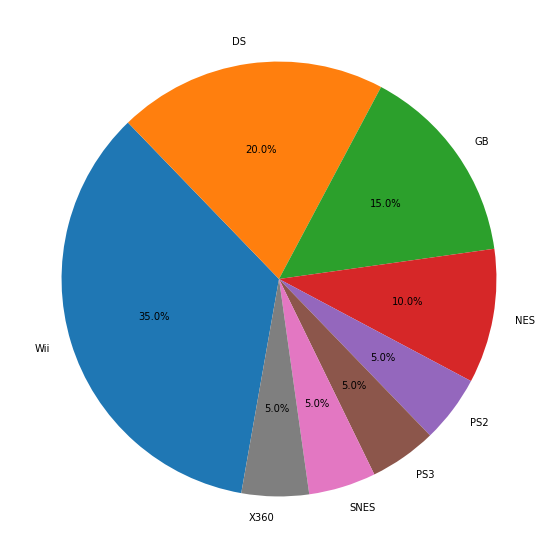

In [56]:
# 2000만장 초과 판매한 게임의 platform의 비율 시각화
ax = plt.subplots(figsize=(15,10))
ratio_platform = df_popular.value_counts(df_popular.Platform).values
labels_platform = df_popular.value_counts(df_popular.Platform).index

plt.pie(ratio_platform, labels=labels_platform, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

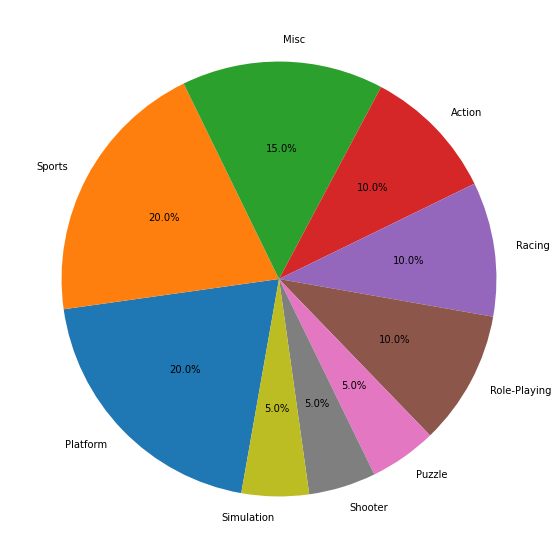

In [57]:
# 2000만장 초과 판매한 게임의 Genre 비율 시각화
ax = plt.subplots(figsize=(15,10))
ratio_genre = df_popular.value_counts(df_popular.Genre).values
labels_genre = df_popular.value_counts(df_popular.Genre).index

plt.pie(ratio_genre, labels=labels_genre, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

In [59]:
# 2000만장 초과 판매한 게임들 중 가장 있기있는 platform은 wii,DS,GB
# 2000만장 초과 판매한 게임들 중 가장 있기있는 platform은 platform,Sports,Misc

In [60]:
# 2000만장 초과 판매한 게임의 년도와 platform만 추출
df_trend_platform_popular = df_popular[['Year','Platform']]
df_trend_platform_popular

,Year,Platform
0,2006,Wii
1,1985,NES
2,2008,Wii
3,2009,Wii
4,1996,GB
5,1989,GB
6,2006,DS
7,2006,Wii
8,2009,Wii
9,1984,NES


In [61]:
# 조사된 모든 게임의 년도와 platform 추출
df_trend_platform = df[['Year','Platform']]
df_trend_platform

,Year,Platform
6654,2006,Wii
128,1985,NES
8549,2008,Wii
9785,2009,Wii
953,1996,GB
...,...,...
7272,2007,PC
5218,2005,GBA
13571,2012,PS3
10091,2009,DS


In [70]:
# 조사된 모든 게임의 년도별 platform별 발매량 계산
df_trend_platform_wii = df_trend_platform.query("Platform == 'Wii'")
wii_trend = df_trend_platform_wii.value_counts().reset_index().sort_values(by='Year' ,ascending=True)

df_trend_platform_nes = df_trend_platform.query('Platform == "NES"')
nes_trend = df_trend_platform_nes.value_counts().reset_index().sort_values(by='Year' ,ascending=True)

df_trend_platform_gb = df_trend_platform.query('Platform == "GB"')
gb_trend = df_trend_platform_gb.value_counts().reset_index().sort_values(by='Year' ,ascending=True)

df_trend_platform_ds = df_trend_platform.query('Platform == "DS"')
ds_trend = df_trend_platform_ds.value_counts().reset_index().sort_values(by='Year' ,ascending=True)

df_trend_platform_x360 = df_trend_platform.query('Platform == "X360"')
x360_trend = df_trend_platform_x360.value_counts().reset_index().sort_values(by='Year' ,ascending=True)

df_trend_platform_ps3 = df_trend_platform.query('Platform == "PS3"')
ps3_trend = df_trend_platform_ps3.value_counts().reset_index().sort_values(by='Year' ,ascending=True)

df_trend_platform_ps2 = df_trend_platform.query('Platform == "PS2"')
ps2_trend = df_trend_platform_ps2.value_counts().reset_index().sort_values(by='Year' ,ascending=True)

df_trend_platform_snes = df_trend_platform.query('Platform == "SNES"')
snes_trend = df_trend_platform_snes.value_counts().reset_index().sort_values(by='Year' ,ascending=True)

df_trend_platform_ps4 = df_trend_platform.query('Platform == "PS4"')
ps4_trend = df_trend_platform_ps4.value_counts().reset_index().sort_values(by='Year' ,ascending=True)

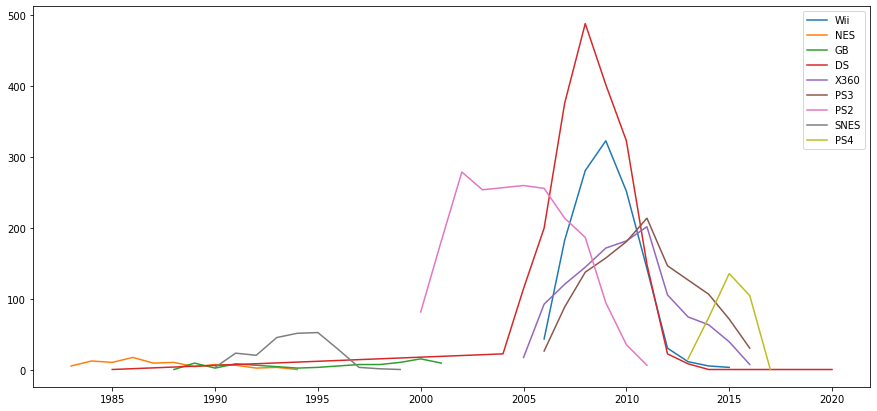

In [71]:
# 조사된 모든 게임의 년도별 platform별 발매량 시각화
legend_platform = ['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES','PS4']

plt.figure(figsize=(15,7))
plt.plot(wii_trend.Year,wii_trend[0])
plt.plot(nes_trend.Year,nes_trend[0])
plt.plot(gb_trend.Year,gb_trend[0])
plt.plot(ds_trend.Year,ds_trend[0])
plt.plot(x360_trend.Year,x360_trend[0])
plt.plot(ps3_trend.Year,ps3_trend[0])
plt.plot(ps2_trend.Year,ps2_trend[0])
plt.plot(snes_trend.Year,snes_trend[0])
plt.plot(ps4_trend.Year,ps4_trend[0])
plt.legend(legend_platform)

In [64]:
# 2000년대 후반에 절정이었고 이후로는 줄어드는 추세
# 2010년 이후의 조사 된 데이터 수가 적음

In [81]:
df_sales_country_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,855.96,512.52,155.73,183.64
Adventure,101.33,63.32,51.79,16.64
Fighting,220.11,99.72,86.39,36.10
Misc,394.29,207.68,103.71,72.54
Platform,442.46,199.40,129.22,51.15
Puzzle,121.00,50.39,56.19,12.39
Racing,353.57,234.20,55.42,76.23
Role-Playing,307.08,176.31,336.25,54.71
Shooter,570.89,307.26,37.34,100.82


<BarContainer object of 4 artists>

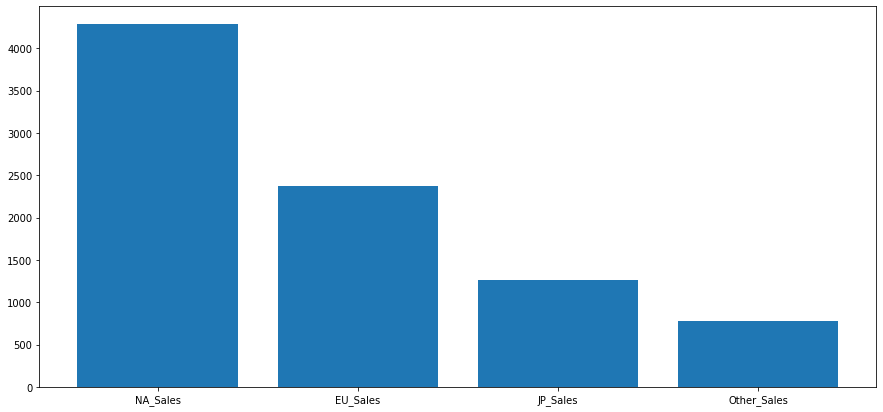

In [80]:
# 나라별 판매량 비율
plt.figure(figsize=(15,7))
plt.bar(df_sales_country_genre.columns, df_sales_country_genre.sum())

([<matplotlib.patches.Wedge at 0x7fca8bcfeb50>,
 [Text(-1.0876125311162148, 0.16461768483058203, 'NA_Sales'),
  Text(0.9166684341701572, 0.608045213611646, 'EU_Sales'),
  Text(0.8210338798463662, -0.7320542112059891, 'JP_Sales'),
  Text(0.11717828436993405, -1.0937409426697526, 'Other_Sales')],
 [Text(-0.5932431987906626, 0.08979146445304473, '49.2%'),
  Text(0.500000964092813, 0.33166102560635236, '27.3%'),
  Text(0.4478366617343816, -0.39930229702144854, '14.5%'),
  Text(0.06391542783814584, -0.5965859687289559, '9.0%')])

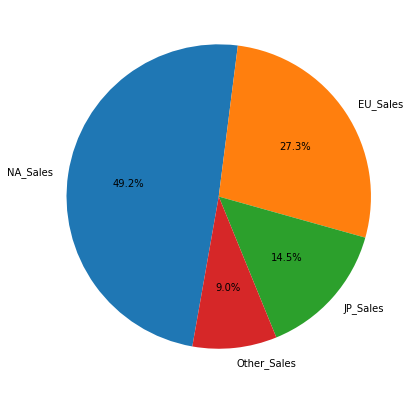

In [86]:
# 나라별 판매량 비율
plt.figure(figsize=(15,7))
plt.pie(df_sales_country_genre.sum(), labels=df_sales_country_genre.columns, autopct='%.1f%%', startangle=260, counterclock=False)

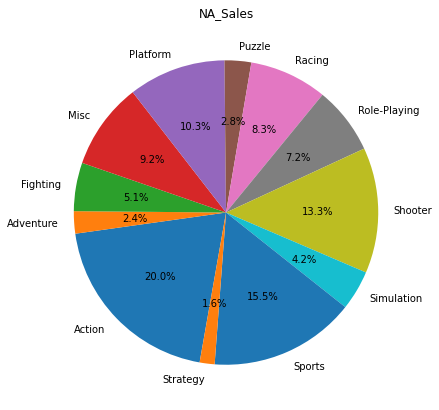

In [88]:
plt.figure(figsize=(15,7))
plt.title('NA_Sales')
plt.pie(df_sales_country_genre['NA_Sales'], labels=df_sales_country_genre.index, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

In [ ]:
# 북미 시장을 목표로 platform은 PS4, 장르는 Sports를 고르는 것이 가장 안정적인 선택이 될거라곳 생각됨